In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df = df.dropna(subset=['bmi'], axis=0)

In [5]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df2 = df.copy()

In [7]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
df.hypertension.unique()

array([0, 1], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [11]:
df.smoking_status.value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [12]:
df.corr(numeric_only = True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


<Axes: >

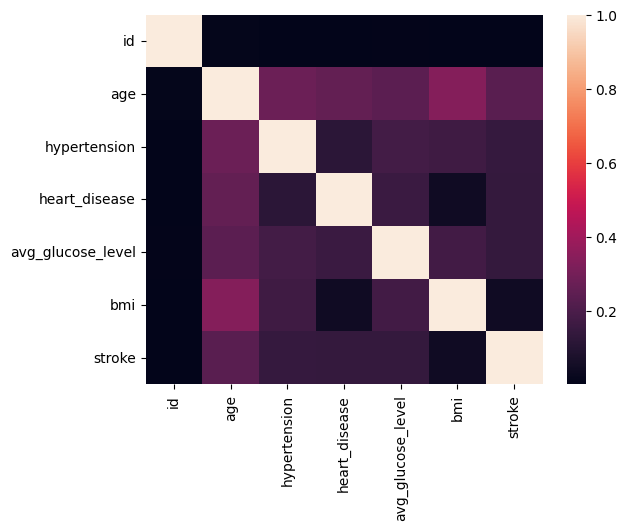

In [13]:
sns.heatmap(df.corr(numeric_only = True))

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [16]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])
df['gender'].unique()

array([1, 0, 2])

In [17]:
le_ever_married = LabelEncoder()
df['ever_married'] = le_ever_married.fit_transform(df['ever_married'])
df['ever_married'].unique()

array([1, 0])

In [18]:
le_work_type = LabelEncoder()
df['work_type'] = le_work_type.fit_transform(df['work_type'])
df['work_type'].unique()

array([2, 3, 0, 4, 1])

In [19]:
le_Residence_type = LabelEncoder()
df['Residence_type'] = le_Residence_type.fit_transform(df['Residence_type'])
df['Residence_type'].unique()

array([1, 0])

In [20]:
le_smoking_status = LabelEncoder()
df['smoking_status'] = le_smoking_status.fit_transform(df['smoking_status'])
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [21]:
X = df.drop(['id','stroke'],axis = 1)
y = df['stroke']

In [22]:
k = 5  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


In [23]:
selected_features

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')

In [24]:
X = df[['age','hypertension','heart_disease','ever_married','avg_glucose_level']]
y = df['stroke']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
pip install imblearn

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [31]:
X_resampled

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,56.0,0,0,1,125.87
1,24.0,0,0,1,103.45
2,81.0,1,1,1,59.11
3,32.0,0,0,0,68.19
4,62.0,0,0,1,203.57
...,...,...,...,...,...
7517,52.0,0,0,1,96.59
7518,78.0,0,0,1,58.57
7519,60.0,0,0,1,97.43
7520,53.0,0,0,1,64.17


In [32]:
y_resampled.value_counts()

stroke
0    3761
1    3761
Name: count, dtype: int64

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_resampled,y_resampled.values)

RandomForestClassifier(random_state=0)

In [35]:
y_pred = rf_classifier.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [37]:
y_test.value_counts()

stroke
0    939
1     43
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
PredY_series = pd.Series(y_pred)
Y_test_series = pd.Series(y_test)

In [40]:
confusion_matrix = pd.crosstab(Y_test_series, PredY_series, rownames = ['Actual'],colnames = ['Predicted'])

In [41]:
confusion_matrix

Predicted,0,1
Actual,,
0,144,6
1,39,4


In [42]:
rf_classifier.score(X_test,y_test)

0.9327902240325866

In [43]:
X

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,67.0,0,1,1,228.69
2,80.0,0,1,1,105.92
3,49.0,0,0,1,171.23
4,79.0,1,0,1,174.12
5,81.0,0,0,1,186.21
...,...,...,...,...,...
5104,13.0,0,0,0,103.08
5106,81.0,0,0,1,125.20
5107,35.0,0,0,1,82.99
5108,51.0,0,0,1,166.29


In [44]:
x = np.array([[53,0,0,'Yes',171.45]])
x

array([['53', '0', '0', 'Yes', '171.45']], dtype='<U32')

In [45]:
x[:,3] =le_ever_married.transform(x[:,3])
x= x.astype(float)
x

array([[ 53.  ,   0.  ,   0.  ,   1.  , 171.45]])

In [46]:
y_prediction = rf_classifier.predict(x)
y_prediction

C:\Users\user\newfolder\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [47]:
import pickle

In [48]:
stroke_data = {'model': rf_classifier,'le_ever_married':le_ever_married}
with open('saved_stroke_steps.pkl', 'wb') as stroke_file:
    pickle.dump(stroke_data,stroke_file)

In [49]:
with open('saved_stroke_steps.pkl', 'rb') as stroke_file:
    stroke_data = pickle.load(stroke_file)
    
rf_classifier_loaded = stroke_data['model']
le_ever_married = stroke_data['le_ever_married']
